In [2]:
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np

from __future__ import division
import os
import shutil
from subprocess import call
import itertools
import fnmatch
from calendar import monthrange
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import MultiPolygon
import geopandas as gpd
import pandas as pd

In [3]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

In [4]:
from numpy import polyfit, poly1d
from stats import cr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [5]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [6]:
import geopandas as gpd
from shapely import wkt

In [129]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp_mrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Mekong_Basin.shp'
shp_lrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Basin.shp'


In [7]:
ds_pscf = xr.open_mfdataset('pscf_wet/re_pscf_wet.nc')
ds_wpscf = xr.open_mfdataset('pscf_wet/re_wpscf_wet.nc')

In [8]:
df_last = pd.read_csv('fd_wet_traj/merged_lastpoint.csv')

In [9]:
df_last

,Unnamed: 0,lat,lon,year
0,0,72.008,-10.937,2022
1,1,68.020,-39.701,2022
2,2,67.387,-20.953,2022
3,3,38.410,19.654,2022
4,4,30.350,18.567,2022
...,...,...,...,...
1058761,10658,26.679,20.276,1960
1058762,10659,20.096,73.012,1960
1058763,10660,21.123,68.798,1960
1058764,10661,15.301,77.189,1960


# wet season

### Recalculate WPSCF

In [10]:
ds_m = xr.open_mfdataset('pscf_wet/domain_m_*.nc')
ds_n = xr.open_mfdataset('pscf_wet/domain_n_*.nc')

array_m = ds_m.domain_m.values
array_n = ds_n.domain_n.values
pscf = array_m/array_n
wpscf = array_m/array_n


array_n[array_n == 0] = np.nan
average_n = np.nanmean(array_n)

condition_1 = array_n > 3*average_n
condition_2 = (1.5*average_n < array_n) & (array_n <= 3*average_n)
condition_3 = (1*average_n < array_n) & (array_n <= 1.5*average_n)
condition_4 = array_n <= 1*average_n

wpscf[condition_1] *= 1.0
wpscf[condition_2] *= 0.7
wpscf[condition_3] *= 0.4
wpscf[condition_4] *= 0.2

ds_wpscf = xr.Dataset({'wpscf': (['time', 'lat', 'lon'], wpscf)},
                coords={'lon': (['lon'], ds_pscf.lon.values),
                        'lat': (['lat'], ds_pscf.lat.values),
                        'time': (['time'], np.arange(1960,2023)),})
ds_pscf = xr.Dataset({'pscf': (['time', 'lat', 'lon'], pscf)},
                coords={'lon': (['lon'], ds_pscf.lon.values),
                        'lat': (['lat'], ds_pscf.lat.values),
                        'time': (['time'], np.arange(1960,2023)),})

### using SOM for moisture source clustering 

In [481]:
from SOM_ import SOM as mySOM

In [527]:
last_SOM = np.vstack((np.array(df_last['lon']), np.array(df_last['lat']))).transpose(1,0)

In [537]:
c = []
iner = []
for k in range(0,10):
    num = k+1
    som = mySOM(m=num, n=1, dim=2)
    som.fit(merged_last)
    predictions = som.predict(merged_last)
    cluster = predictions
    names = locals()
    for i in range(0,num):
        names['last_SOM'+str(i)]=[]
        names['index'+str(i)] = np.argwhere(cluster==i)
        names['index'+str(i)] = names['index'+str(i)].reshape(names['index'+str(i)].shape[0])
        for j in range(0,names['index'+str(i)].shape[0]):
            names['last_SOM'+str(i)] = np.append(names['last_SOM'+str(i)],last_SOM[names['index'+str(i)][j]])
        names['last_SOM'+str(i)] = np.array(names['last_SOM'+str(i)]).reshape(names['index'+str(i)].shape[0],2)




    last_som_ = []
    for i in range(0,num):
        last_som_ = np.append(last_som_,np.nanmean(names['last_SOM'+str(i)],axis=0))
    last_som_.reshape(num,2).shape
    som._find_bmu(last_som_.reshape(num,2))
    print(som._inertia_/1000000)



    #fig = plt.figure(figsize=(8, 3), dpi=300)
    #plt.imshow(np.nanmean(gph5000,axis=0),vmax=5800,vmin=5400,cmap='plasma')
    #plt.colorbar()
    c.append(k+1)
    iner.append(som._inertia_/1000000)

1803.2157560996661
1091.7783604084934
750.5389133472703
574.6387523615508
506.561367755656
415.56367569345554
331.6225352899719
321.40608795878046
273.7096593443374
245.5900659661606


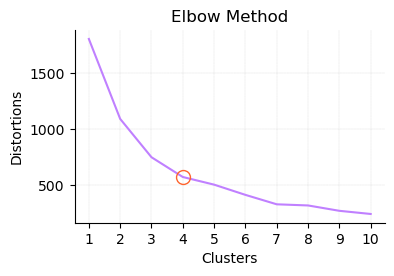

In [541]:
fig, ax = plt.subplots(figsize=[4,2.5],dpi=100)
ax.plot(c, iner,c='#c080ff')
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Distortions')

ax.plot(c[3], iner[3], marker='o', markersize=10, color='#fe642e', fillstyle='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(c)

ax.grid(ls='--',lw=0.1,alpha=0.5,color='k')
plt.show()

#### cluster to 4 group would be the best choice

In [542]:
som = mySOM(m=4,  # how many cluster you want 
            n=1,
            dim=2)  # the values you want to cluster
som.fit(merged_last)
predictions = som.predict(merged_last)

In [550]:
df_cluster = pd.read_csv('fd_wet_traj/last_cluster_result.csv')

In [553]:
cluster4 = np.array(df_cluster['cluster'])

In [561]:
last_c0 = last_SOM[cluster4==0]
last_c1 = last_SOM[cluster4==1]
last_c2 = last_SOM[cluster4==2]
last_c3 = last_SOM[cluster4==3]

### Water vapor source zoning

2023-12-07  17:46:09 ERROR PROJ: internal_proj_identify: /home/wang-k/.conda/envs/gongguo/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


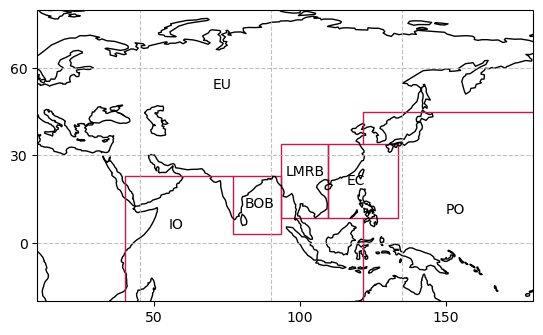

In [11]:
lons, lats = np.meshgrid(ds_wpscf.lon.values, ds_wpscf.lat.values)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, dpi=100)
ax.set_extent([10, 180, -20, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-60, 91, 30))

ax.add_patch(mpatches.Rectangle(xy=[93.5, 8.5], width=16, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # LMRB
ax.add_patch(mpatches.Rectangle(xy=[109.5, 8.5], width=24, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # SCS
ax.add_patch(mpatches.Rectangle(xy=[77, 3], width=16.5, height=20, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # BOB

line_segments2 = np.array([[77, 23], [40, 23], [40, -45], [121.5, -45], [121.5, -30]]) 
ax.plot(line_segments2[:, 0], line_segments2[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # IO
line_segments1 = np.array([ [121.5, 8.5], [121.5, -30],[190, -30], [190, 45],  [121.5, 45],[121.5, 34],]) 
ax.plot(line_segments1[:, 0], line_segments1[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # PO

# stack_shp(ax, shp, facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8)
ax.text(95, 23, 'LMRB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(116, 20, 'EC', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(81, 12, 'BOB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(55, 5, 'IO', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(70, 53, 'EU', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(150, 10, 'PO', color='black', fontsize=10, transform=ccrs.PlateCarree())


ax.set_xticks([50, 100, 150], crs=ccrs.PlateCarree())
ax.set_yticks([0, 30, 60,], crs=ccrs.PlateCarree())
plt.show()

### PSCF

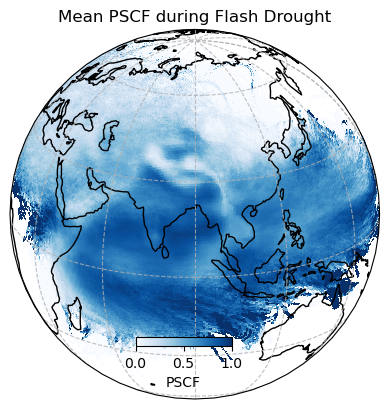

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30))
pscf = ds_pscf.mean('time').pscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)

cax = fig.add_axes([0.42, 0.22, 0.15, 0.02])

cbar = plt.colorbar(pscf , cax=cax, orientation='horizontal',)
cbar.set_label('PSCF')
cbar.set_ticks([0,0.5,1.0])

ax.set_title('Mean PSCF during Flash Drought')
plt.show()

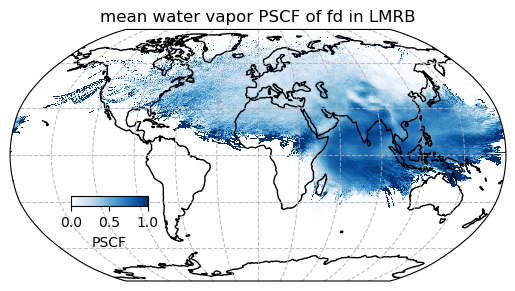

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--', alpha=0.8, xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30))
pscf = ds_pscf.mean('time').pscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)

cax = fig.add_axes([0.22, 0.39, 0.12, 0.02])
cbar = plt.colorbar(pscf, cax=cax, orientation='horizontal')
cbar.set_label('PSCF')
cbar.set_ticks([0,0.5,1.0])
ax.set_title('mean water vapor PSCF of fd in LMRB')
# stack_shp(ax, shp, facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8)
plt.show()

### WPSCF

In [14]:
line_segments_po1 = np.array([[121.5, -30], [121.5, 14]])  # PO
line_segments_po2 = np.array([[121.5, 33.5], [121.5, 45]])  # PO
line_segments_po3 = np.array([[121.5, 45], [190, 45]])  # PO
line_segments_po4 = np.array([[190, 45], [190, -30]])  # PO
line_segments_po5 = np.array([[121.5, -30], [190, -30]]) # PO

line_segments_io1 = np.array([[77, 23], [40, 23]])  # IO  
line_segments_io2 = np.array([[40, 23], [40, -45]])  # IO  
line_segments_io3 = np.array([[40, -45], [121.5, -45]])  # IO  
line_segments_io4 = np.array([[121.5, -45], [121.5, -30]])  # IO  

line_segments_bob1 = np.array([[77, 3], [93.5, 3]])  # BOB  
line_segments_bob2 = np.array([[77, 3], [77, 23]])  # BOB  
line_segments_bob3 = np.array([[93.5, 3], [93.5, 23]])  # BOB  
line_segments_bob4 = np.array([[77, 23], [93.5, 23]])  # BOB  

line_segments_scs1 = np.array([[109.5, 14], [133.5, 14]])  # SCS 
line_segments_scs2 = np.array([[109.5, 14], [109.5, 33.5]])  # SCS 
line_segments_scs3 = np.array([[133.5, 14], [133.5, 33.5]])  # SCS 
line_segments_scs4 = np.array([[109.5, 33.5], [133.5, 33.5]])  # SCS 

line_segments_lmrb1 = np.array([[93.5, 8.5], [109.5, 8.5]])  # LMRB 
line_segments_lmrb2 = np.array([[93.5, 8.5], [93.5, 33.5]])  # LMRB
line_segments_lmrb3 = np.array([[109.5, 8.5], [109.5, 33.5]])  # LMRB
line_segments_lmrb4 = np.array([[93.5, 33.5], [109.5, 33.5]])  # LMRB 

line_segments = [line_segments_po1, line_segments_po2, line_segments_po3, line_segments_po4, line_segments_po5,
                 line_segments_io1, line_segments_io2, line_segments_io3,  line_segments_io4,
                 line_segments_bob1, line_segments_bob2, line_segments_bob3, line_segments_bob4,
                 line_segments_scs1, line_segments_scs2, line_segments_scs3, line_segments_scs4,
                 line_segments_lmrb1, line_segments_lmrb2, line_segments_lmrb3, line_segments_lmrb4]

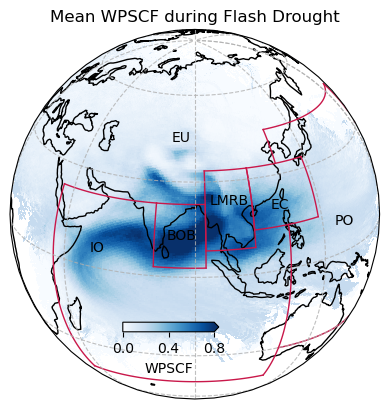

In [15]:
projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
wpscf = ds_wpscf.mean('time').wpscf.plot(transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False,vmin=0,vmax=0.8)

cax = fig.add_axes([0.4, 0.25, 0.15, 0.02])
cbar = plt.colorbar(wpscf, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.4,0.8])


for line_segment in line_segments:
    lon, lat = line_segment.T
    lon_interp = np.linspace(lon[0], lon[1], 100)
    lat_interp = np.linspace(lat[0], lat[1], 100)

    lon_interp, lat_interp = projection.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)[..., :2].T
    ax.plot(lon_interp, lat_interp, color='#c9184a', linewidth=1, transform=projection)

ax.text(95, 23, 'LMRB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(116, 20, 'EC', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(81, 12, 'BOB', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(55, 5, 'IO', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(80, 43, 'EU', color='black', fontsize=10, transform=ccrs.PlateCarree())
ax.text(140, 10, 'PO', color='black', fontsize=10, transform=ccrs.PlateCarree())

ax.set_title('Mean WPSCF during Flash Drought')
plt.show()

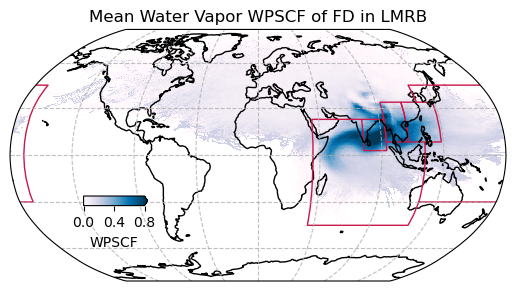

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, dpi=100)

ax.set_global()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))
ax.coastlines()

wpscf = ds_wpscf.mean('time').wpscf.plot(transform=ccrs.PlateCarree(), cmap='PuBu', add_colorbar=False,vmin=0,vmax=0.8)

cax = fig.add_axes([0.24, 0.39, 0.10, 0.02]) 
cbar = plt.colorbar(wpscf, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.4,0.8])

ax.add_patch(mpatches.Rectangle(xy=[93.5, 8.5], width=16, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # LMRB
ax.add_patch(mpatches.Rectangle(xy=[109.5, 8.5], width=24, height=25.5, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # SCS
ax.add_patch(mpatches.Rectangle(xy=[77, 3], width=16.5, height=20, edgecolor='#c9184a', linewidth=1, facecolor='none',
             transform=ccrs.PlateCarree()))   # BOB

line_segments2 = np.array([[77, 23], [40, 23], [40, -45], [121.5, -45], [121.5, -30]]) 
ax.plot(line_segments2[:, 0], line_segments2[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # IO
line_segments1 = np.array([ [121.5, 8.5], [121.5, -30],[190, -30], [190, 45],  [121.5, 45],[121.5, 34],]) 
ax.plot(line_segments1[:, 0], line_segments1[:, 1], color='#c9184a', linewidth=1, transform=ccrs.PlateCarree()) # PO

ax.set_title('Mean Water Vapor WPSCF of FD in LMRB')

plt.show()

In [17]:
LMRB_wpscf = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(25.5, 8.5))
BOB_wpscf = ds_wpscf.sel(lon=slice(77, 93.5), lat=slice(23, 3))
SCS_wpscf = ds_wpscf.sel(lon=slice(109.5, 133.5), lat=slice(34, 8.5))

region1_PO = ds_wpscf.sel(lon=slice(121.5, 133.5), lat=slice(45, 34))
region2_PO = ds_wpscf.sel(lon=slice(121.5, 133.5), lat=slice(8.5, -30))
region3_PO = ds_wpscf.sel(lon=slice(133.5, 180), lat=slice(45, -30))
region4_PO = ds_wpscf.sel(lon=slice(-180, -170), lat=slice(45, -30))
PO_wpscf = xr.concat([region1_PO, region2_PO,], dim="new_dim")

region1_IO = ds_wpscf.sel(lon=slice(40, 77), lat=slice(23, -45))
region2_IO = ds_wpscf.sel(lon=slice(77, 121.5), lat=slice(3, -45))
region3_IO = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(8.5, 3))
IO_wpscf = xr.concat([region1_IO, region2_IO, region3_IO], dim="new_dim")

region1_EU = ds_wpscf.sel(lon=slice(40, 93.5), lat=slice(90, 23))
region2_EU = ds_wpscf.sel(lon=slice(93.5, 109.5), lat=slice(90, 25.5))
region3_EU = ds_wpscf.sel(lon=slice(109.5, 121.5), lat=slice(90, 28))
region4_EU = ds_wpscf.sel(lon=slice(121.5, 190), lat=slice(90, 45))
region5_EU = ds_wpscf.sel(lon=slice(-170, 40), lat=slice(90, -45))
EU_wpscf = xr.concat([region1_EU, region2_EU, region3_EU, region4_EU, region5_EU], dim="new_dim")

In [18]:
arr_LMRB_wpscf = LMRB_wpscf.wpscf.values
arr_BOB_wpscf = BOB_wpscf.wpscf.values
arr_SCS_wpscf = SCS_wpscf.wpscf.values
arr_PO_wpscf = PO_wpscf.wpscf.values
arr_IO_wpscf = IO_wpscf.wpscf.values
arr_EU_wpscf = EU_wpscf.wpscf.values
arr_tot_wpscf = ds_wpscf.wpscf.values

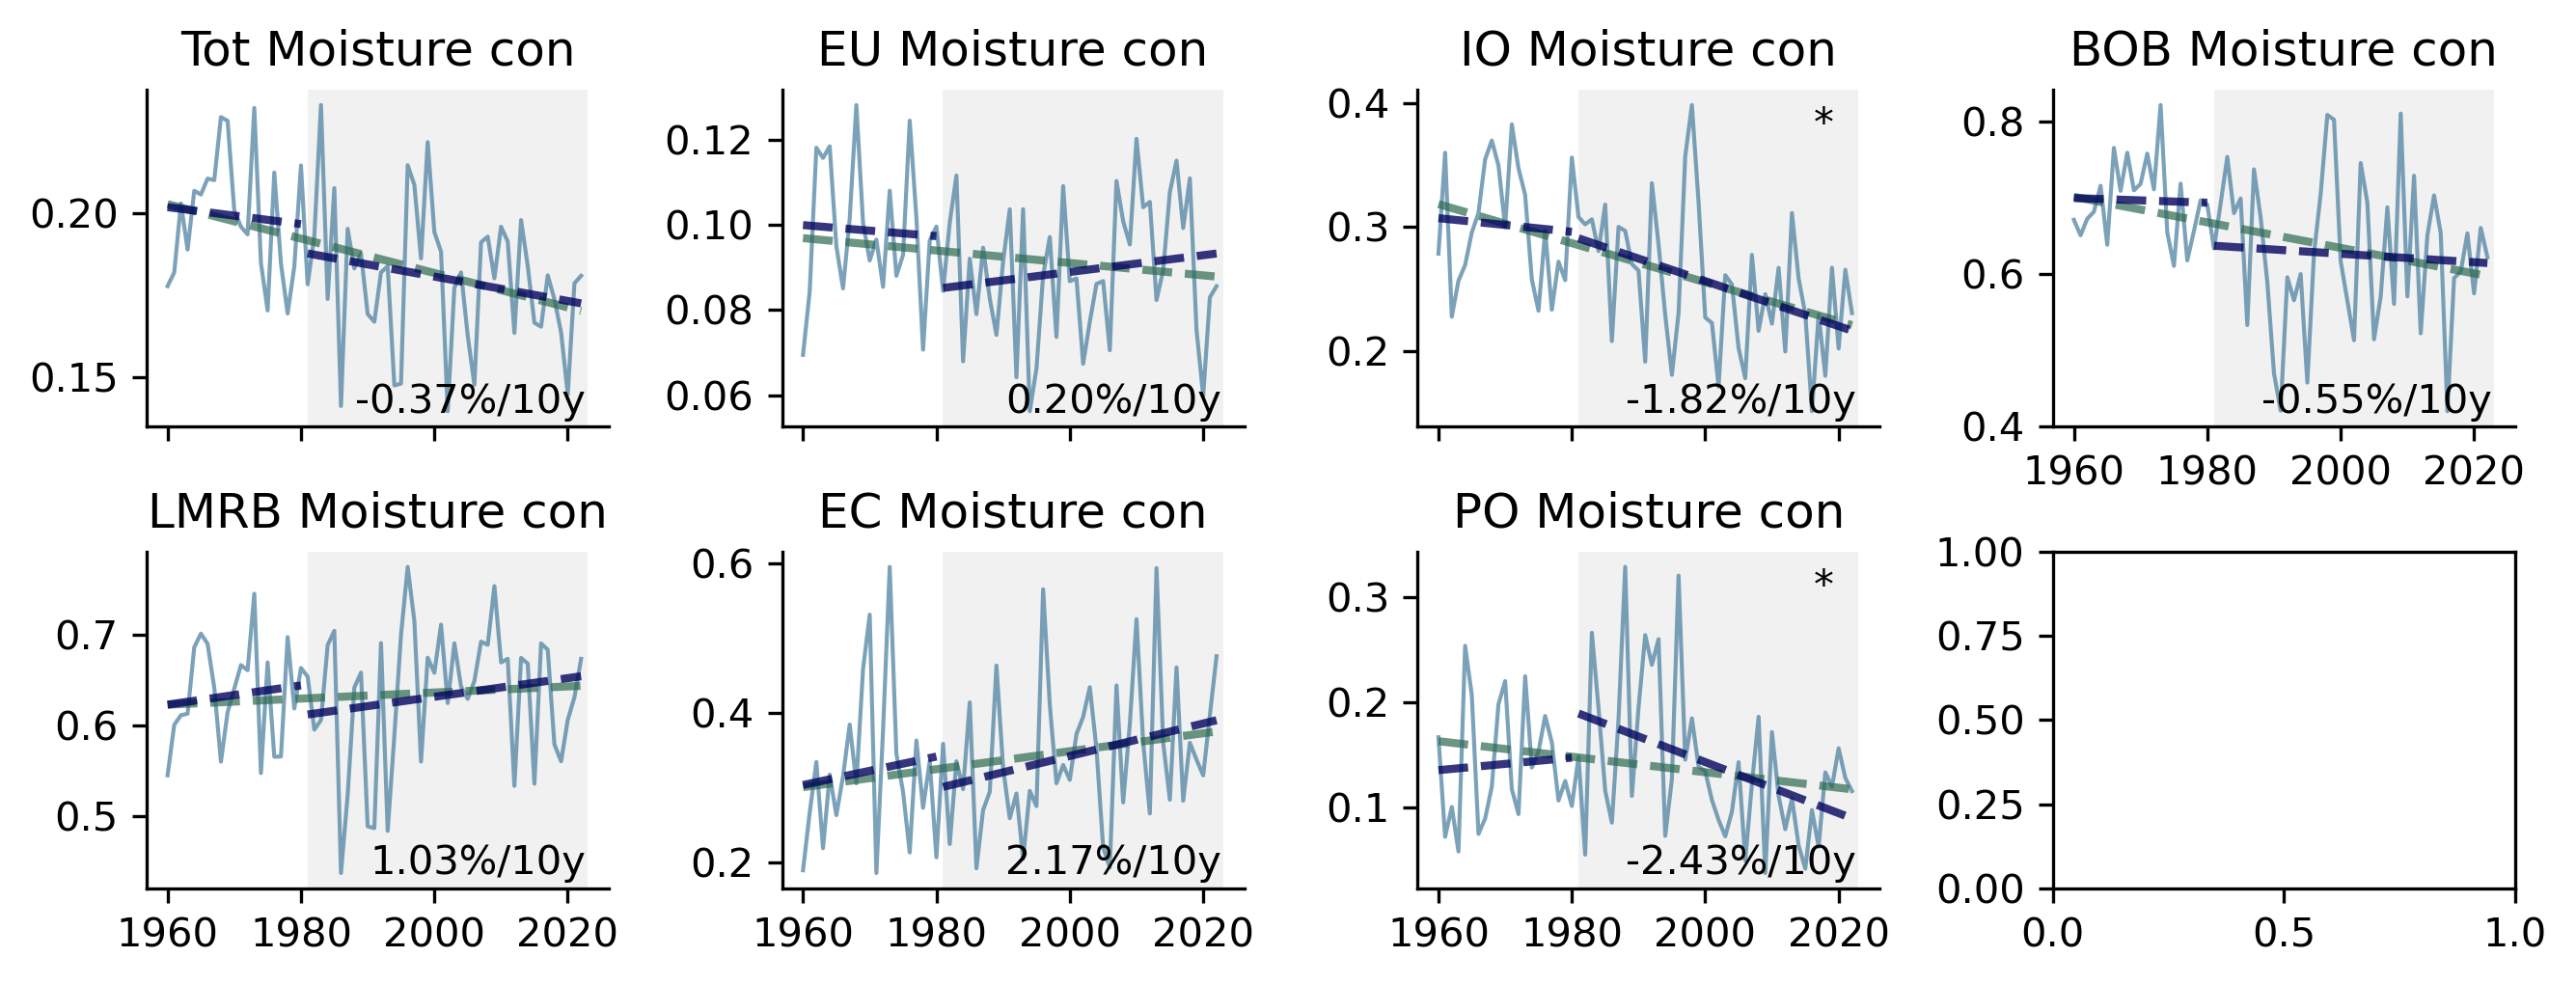

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
varia3 = [np.nanmean(arr_tot_wpscf, axis=(1, 2)),
          np.nanmean(arr_EU_wpscf, axis=(0, 2, 3)), np.nanmean(arr_IO_wpscf, axis=(0, 2, 3)),
          np.nanmean(arr_BOB_wpscf, axis=(1, 2)), np.nanmean(arr_LMRB_wpscf, axis=(1, 2)),
          np.nanmean(arr_SCS_wpscf, axis=(1, 2)), np.nanmean(arr_PO_wpscf, axis=(0, 2, 3)),]
namess = ['Tot Moisture con','EU Moisture con', 'IO Moisture con', 'BOB Moisture con',
          'LMRB Moisture con', 'EC Moisture con', 'PO Moisture con']
x = np.arange(63)
x1 = np.arange(0,21)
x2 = np.arange(21,63)
fig, axes = plt.subplots(2, 4, figsize=(9, 3.5), dpi=300)

for i, ax in enumerate(axes.flat[0:7]):
    slope, intercept, r_value, p_value, std_err = linregress(x, varia3[i])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, varia3[i][0:21])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, varia3[i][21:63])
    ax.plot(varia3[i],color="#457b9d",lw=1,alpha=0.7)
    ax.set_title(namess[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 20, 40, 60])  
    ax.set_xticklabels(['1960',  '1980', '2000', '2020'])  
    ax.plot(x, intercept + slope * x, color='#2d6a4f', linestyle='--',lw= 2,alpha=0.7)
    ax.plot(x1, intercept1 + slope1 * x1, color='#03045e', linestyle='--',lw= 2,alpha=0.8)
    ax.plot(x2, intercept2 + slope2 * x2, color='#03045e', linestyle='--',lw= 2,alpha=0.8)
    ax.axvspan(21, 63, facecolor='lightgray', alpha=0.3)
    ax.text(0.95, 0.13, f'{slope2*1000:.2f}%/10y', ha='right', va='top', transform=ax.transAxes)
    ax.xaxis.set_ticks_position('bottom')  
    ax.yaxis.set_ticks_position('left') 

    if p_value2 < 0.05:
        ax.text(0.90, 0.95, '*', ha='right', va='top', transform=ax.transAxes)

    if i == 0:
        ax.set_xticklabels([])
    if i == 1:
        ax.set_xticklabels([])
    if i == 2:
        ax.set_xticklabels([])
        
plt.tight_layout()
plt.savefig('Fig_save/mois_cont_trend_time.pdf')
plt.show()

In [21]:
names = locals()
namess6 = ['moisture_con']

for k in range(0,1):
    names[namess6[k]+'_p'], names[namess6[k]+'_co']= [],[]
    for i in range(0,361):
        for j in range(0,721):
            array = ds_wpscf.wpscf.values[21:63, i, j]
            if np.isnan(np.nanmean(array)):
                names[namess6[k]+'_co'].append(np.nan)
                names[namess6[k]+'_p'].append(np.nan)
            elif array[~np.isnan(array)].shape[0] < 20:
                names[namess6[k]+'_co'].append(np.nan)
                names[namess6[k]+'_p'].append(np.nan)
            else :
                valid_indices = ~np.isnan(array)
                x = np.arange(ds_wpscf.wpscf.values[21:63, i, j].shape[0])
                x_valid = x[valid_indices]
                arr_valid = array[valid_indices]
                slope, intercept, r_value, p_value, std_err = linregress(x_valid, arr_valid)
                names[namess6[k]+'_co'].append(slope)

                if p_value < 0.05:
                    names[namess6[k]+'_p'].append(1)
                else:
                    names[namess6[k]+'_p'].append(np.nan)
                
    names[namess6[k]+'_p'] = np.array(names[namess6[k]+'_p']).reshape(361,721)
    names[namess6[k]+'_co'] = np.array(names[namess6[k]+'_co']).reshape(361,721)
    
     ################################################################################

clist5=['#035a96','#1079c3','#3d9fee','#ffffff','#ffffff','#ff6d6d','#f26ca7','#920efc']
cmap5 = LinearSegmentedColormap.from_list('chaos',clist5)

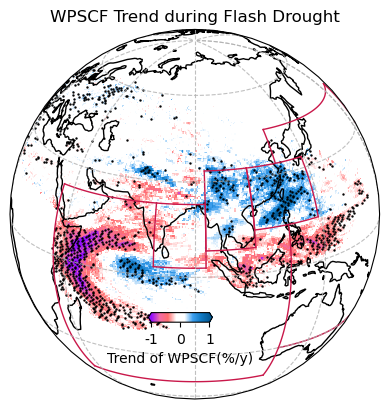

In [29]:
moisture_con_co[np.isnan(moisture_con_co)] = 0

projection = ccrs.Orthographic(central_longitude=90, central_latitude=20)
fig, ax = plt.subplots(subplot_kw={'projection': projection},dpi=100)

ax.set_global()
ax.coastlines()
ax.gridlines(ls='--',alpha=0.8, xlocs=range(-180, 181, 45), ylocs=range(-90, 91, 30))

im = ax.pcolormesh(ds_wpscf.lon, ds_wpscf.lat, moisture_con_co, 
                   transform=ccrs.PlateCarree(), cmap=cmap5.reversed(),vmin=-0.01,vmax=0.01)

cax = fig.add_axes([0.44, 0.27, 0.1, 0.02])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', extend='both')
cbar.set_label('Trend of WPSCF(%/y)')
cbar.set_ticks([-0.01,0,0.01])
cbar.set_ticklabels(['-1','0','1'])

lon_grid, lat_grid = np.meshgrid(ds_wpscf.lon, ds_wpscf.lat)
lon_points = lon_grid.flatten()
lat_points = lat_grid.flatten()
moisture_values = moisture_con_p.flatten()
sc = ax.scatter(lon_points[moisture_values == 1][::5], lat_points[moisture_values == 1][::5],
                color='k', s=0.5, marker='o', transform=ccrs.PlateCarree())


for line_segment in line_segments:
    lon, lat = line_segment.T
    lon_interp = np.linspace(lon[0], lon[1], 100)
    lat_interp = np.linspace(lat[0], lat[1], 100)

    lon_interp, lat_interp = projection.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)[..., :2].T
    ax.plot(lon_interp, lat_interp, color='#c9184a', linewidth=1, transform=projection)

ax.set_title('WPSCF Trend during Flash Drought')
plt.show()

# Dry season

In [133]:
ds_onset = xr.open_dataset('fdonset.nc')
ds_cin = xr.open_dataset('mete_week/CIN/weekly_CIN_lmrb.nc')
ds_omega = xr.open_dataset('mete_week/omega/omega_weekly.nc')

### select onset and antecedent meteorological conditions

In [134]:
onset = ds_onset.onset.values
cin = ds_cin.cin.values
omega = ds_omega.w.values

In [135]:
omega_on=[]
cin_on = []
for i in range(102):
    for j in range(61):
        for l in range(3276):
            if np.isnan(onset[l,i,j]):
                omega_on.append(np.full((4, 12), np.nan))
                cin_on.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif l==(0|1|3274|3275):
                omega_on.append(np.full((4, 12), np.nan))
                cin_on.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif onset[l,i,j]==1:
                omega_on.append(np.array(omega[l-2:l+2,:,i,j]))
                cin_on.append(np.array(cin[l-2:l+2,i,j]))
omega_on = np.vstack(np.array(omega_on)).reshape(102,61,63,52,4,12)
cin_on = np.vstack(np.array(cin_on)).reshape(102,61,63,52,4)

In [136]:
omega_wm = []
cin_wm = []
for i in range(102):
    for j in range(61):
        for l in range(3276):
            if np.isnan(omega[l,1,i,j]):
                omega_wm.append(np.full((4, 12), np.nan))
                cin_wm.append(np.array([np.nan,np.nan,np.nan,np.nan]))
            elif l!=(0|1|3274|3275):
                omega_wm.append(np.array(omega[l-2:l+2,:,i,j]))
                cin_wm.append(np.array(cin[l-2:l+2,i,j]))
            else:
                omega_wm.append(np.full((4, 12), np.nan))
                cin_wm.append(np.array([np.nan,np.nan,np.nan,np.nan]))
                
for i in range(len(omega_wm)):
    if omega_wm[i].size == 0:
        omega_wm[i] = np.full((4, 12), np.nan)

for i in range(len(cin_wm)):
    if cin_wm[i].size == 0:
        cin_wm[i] = np.array([np.nan, np.nan, np.nan, np.nan])
        
omega_wm = np.vstack(np.array(omega_wm)).reshape(102,61,63,52,4,12)
cin_wm = np.vstack(np.array(cin_wm)).reshape(102,61,63,52,4)

In [137]:
omega_lag = omega_on - omega_wm
cin_lag = cin_on - cin_wm

In [139]:
ds_omega_wm = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_wm)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)


ds_omega_on = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_on)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)

ds_omega_wm = xr.Dataset(
    {'w': (['lat', 'lon', 'year', 'week', 'lag', 'level'], omega_wm)},
    coords={
        'lat': (['lat'], ds_omega.lat.values),
        'lon': (['lon'], ds_omega.lon.values),
        'year': (['year'], np.arange(1960, 2023)),
        'week': (['week'], np.arange(0, 52)),
        'lag': (['lag'], np.arange(0, 4)),
        'level': (['level'], ds_omega.level.values),
    }
)


ds_cin_wm = xr.Dataset({'cin': (['lat', 'lon', 'year', 'week','lag'], cin_wm)},
                    coords={'lat': (['lat'], ds_cin.lat.values),
                            'lon': (['lon'], ds_cin.lon.values),
                            'year': (['year'], np.arange(1960,2023)),
                            'week': (['week'], np.arange(0,52)),
                            'lag': (['lag'], np.arange(0,4))})

ds_cin_on = xr.Dataset({'cin': (['lat', 'lon', 'year', 'week','lag'], cin_on)},
                    coords={'lat': (['lat'], ds_cin.lat.values),
                            'lon': (['lon'], ds_cin.lon.values),
                            'year': (['year'], np.arange(1960,2023)),
                            'week': (['week'], np.arange(0,52)),
                            'lag': (['lag'], np.arange(0,4))})

In [143]:
ds_cinon_dry.cin.values.shape

(102, 61, 63, 26, 4)

In [145]:
slice1 = ds_omega_wm.week.isin(range(0, 17))
slice2 = ds_omega_wm.week.isin(range(43, 53))

ds_omegawm_dry = ds_omega_wm.sel(week=(slice1 | slice2))
ds_omegaon_dry = ds_omega_on.sel(week=(slice1 | slice2))

ds_cinwm_dry = ds_cin_wm.sel(week=(slice1 | slice2))
ds_cinon_dry = ds_cin_on.sel(week=(slice1 | slice2))

omega_lag_dry = np.nanmean(ds_omegaon_dry.w.values,axis=(0,1,2,3))-np.nanmean(ds_omegawm_dry.w.values,axis=(0,1,2,3))
variaomega_on = [omega_lag_dry[0],omega_lag_dry[1],omega_lag_dry[2],omega_lag_dry[3],]

cin_lag_dry = np.nanmean(ds_cinon_dry.cin.values,axis=(2,3))-np.nanmean(ds_cinwm_dry.cin.values,axis=(2,3))

In [147]:
variacin_on = [cin_lag_dry[:,:,0],cin_lag_dry[:,:,1],cin_lag_dry[:,:,2],cin_lag_dry[:,:,3],]

In [192]:
clist1 =['#ffffff','#f8ad9d','#ff758f','#3a20f0']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)

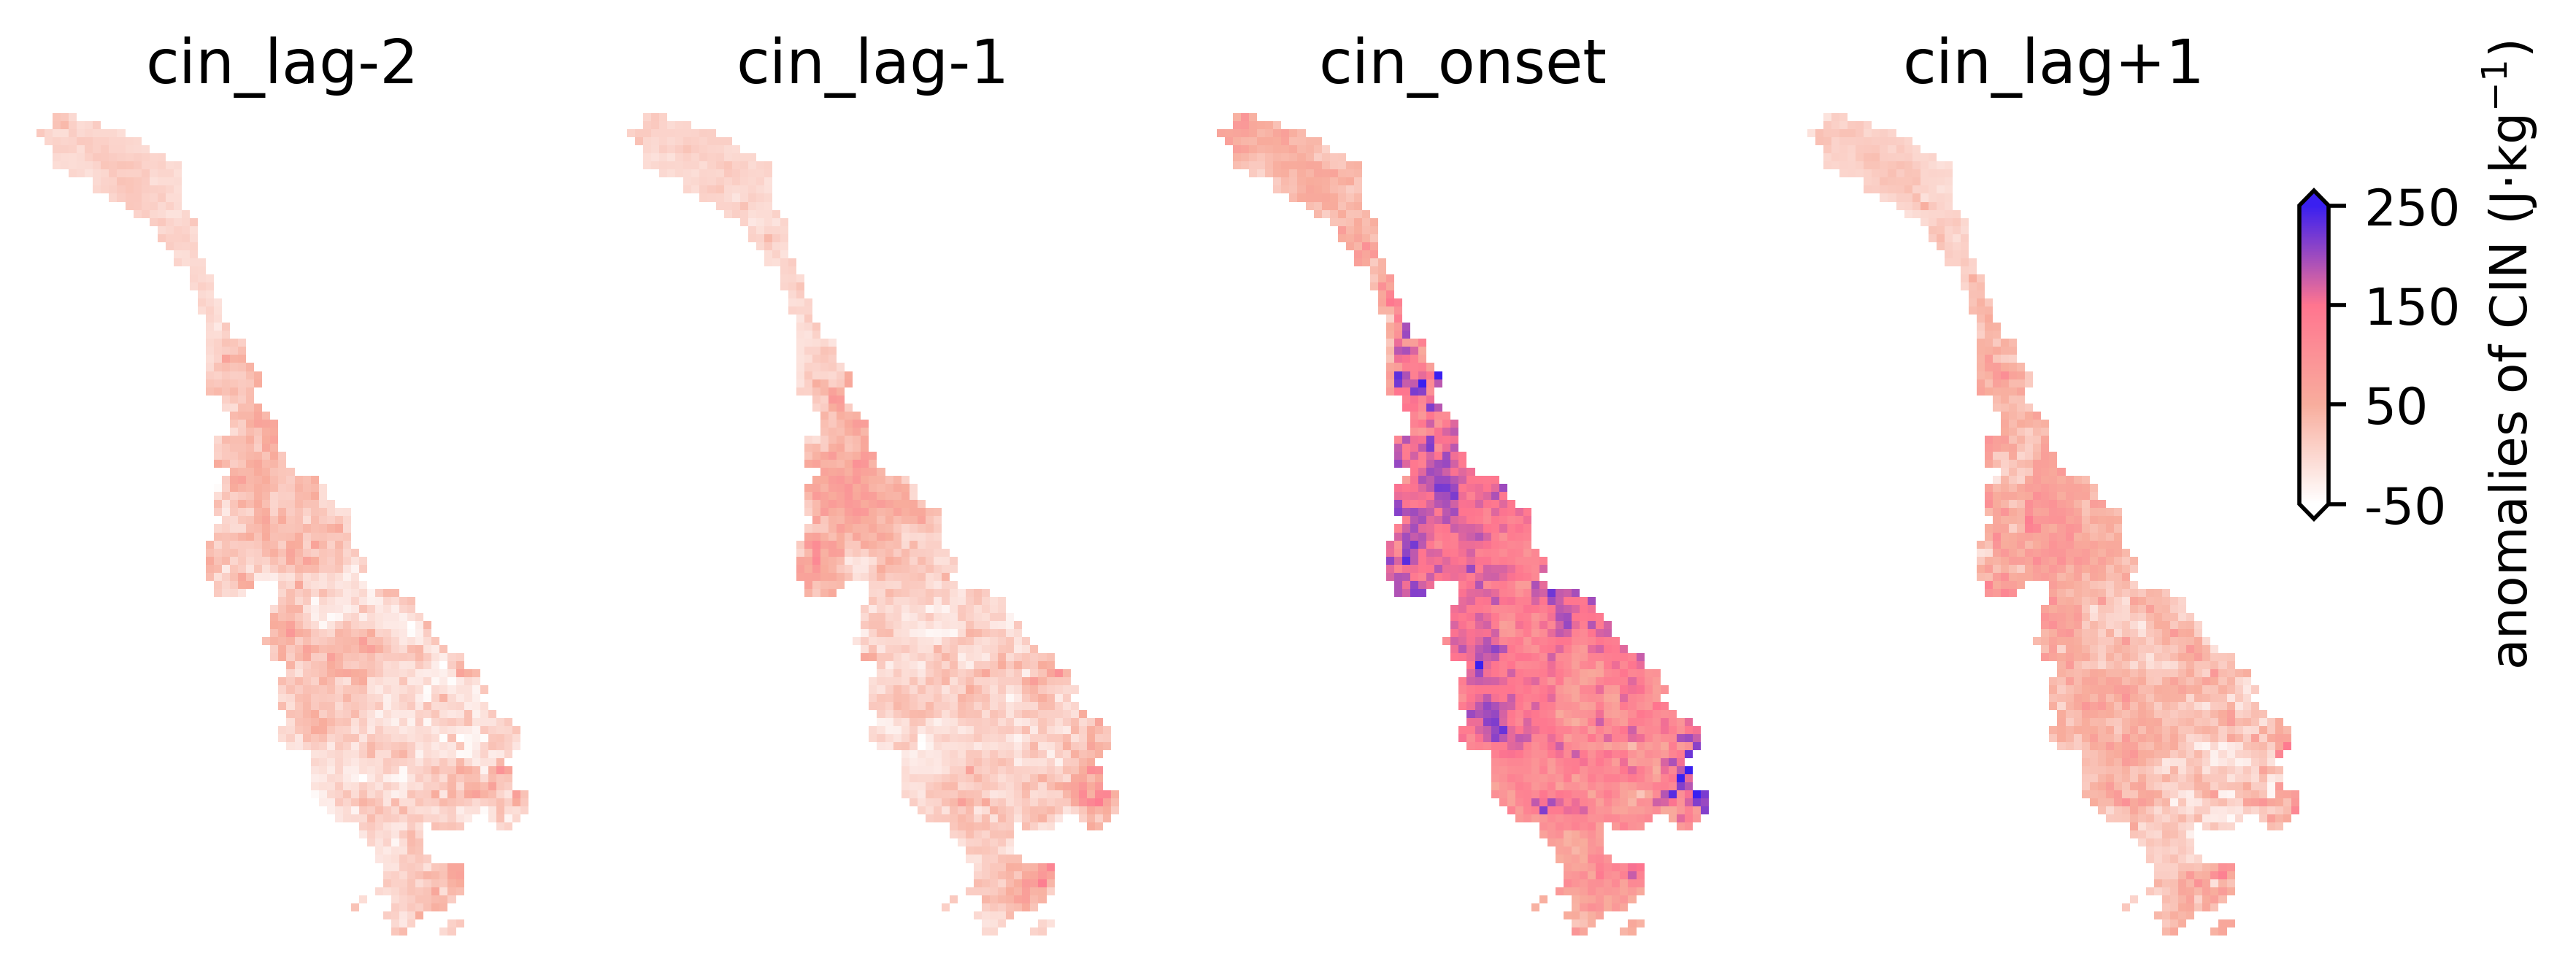

In [194]:
fig, ax = plt.subplots(1, 4, figsize=(8, 3), dpi=500)
images = []

namesscin_on = ['cin_lag-2', 'cin_lag-1', 'cin_onset','cin_lag+1',]


for i, (qt, subplot, name) in enumerate(zip(variacin_on, ax.flat, namesscin_on)):
    im = subplot.imshow(qt, cmap=red1, interpolation='nearest',vmin=-50,vmax=250)
    images.append(im)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_frame_on(False)
    # ax[-1, -1].axis('off')
    subplot.set_title(name)

cax = fig.add_axes([0.9, 0.50, 0.01, 0.3])
cbar = plt.colorbar(im, cax=cax, extend='both')
cbar.set_ticks([-50,50,150,250])
cbar.set_ticklabels(['-50','50','150','250'])
cbar.set_label('anomalies of CIN (J·kg$^{-1}$)')

plt.show()

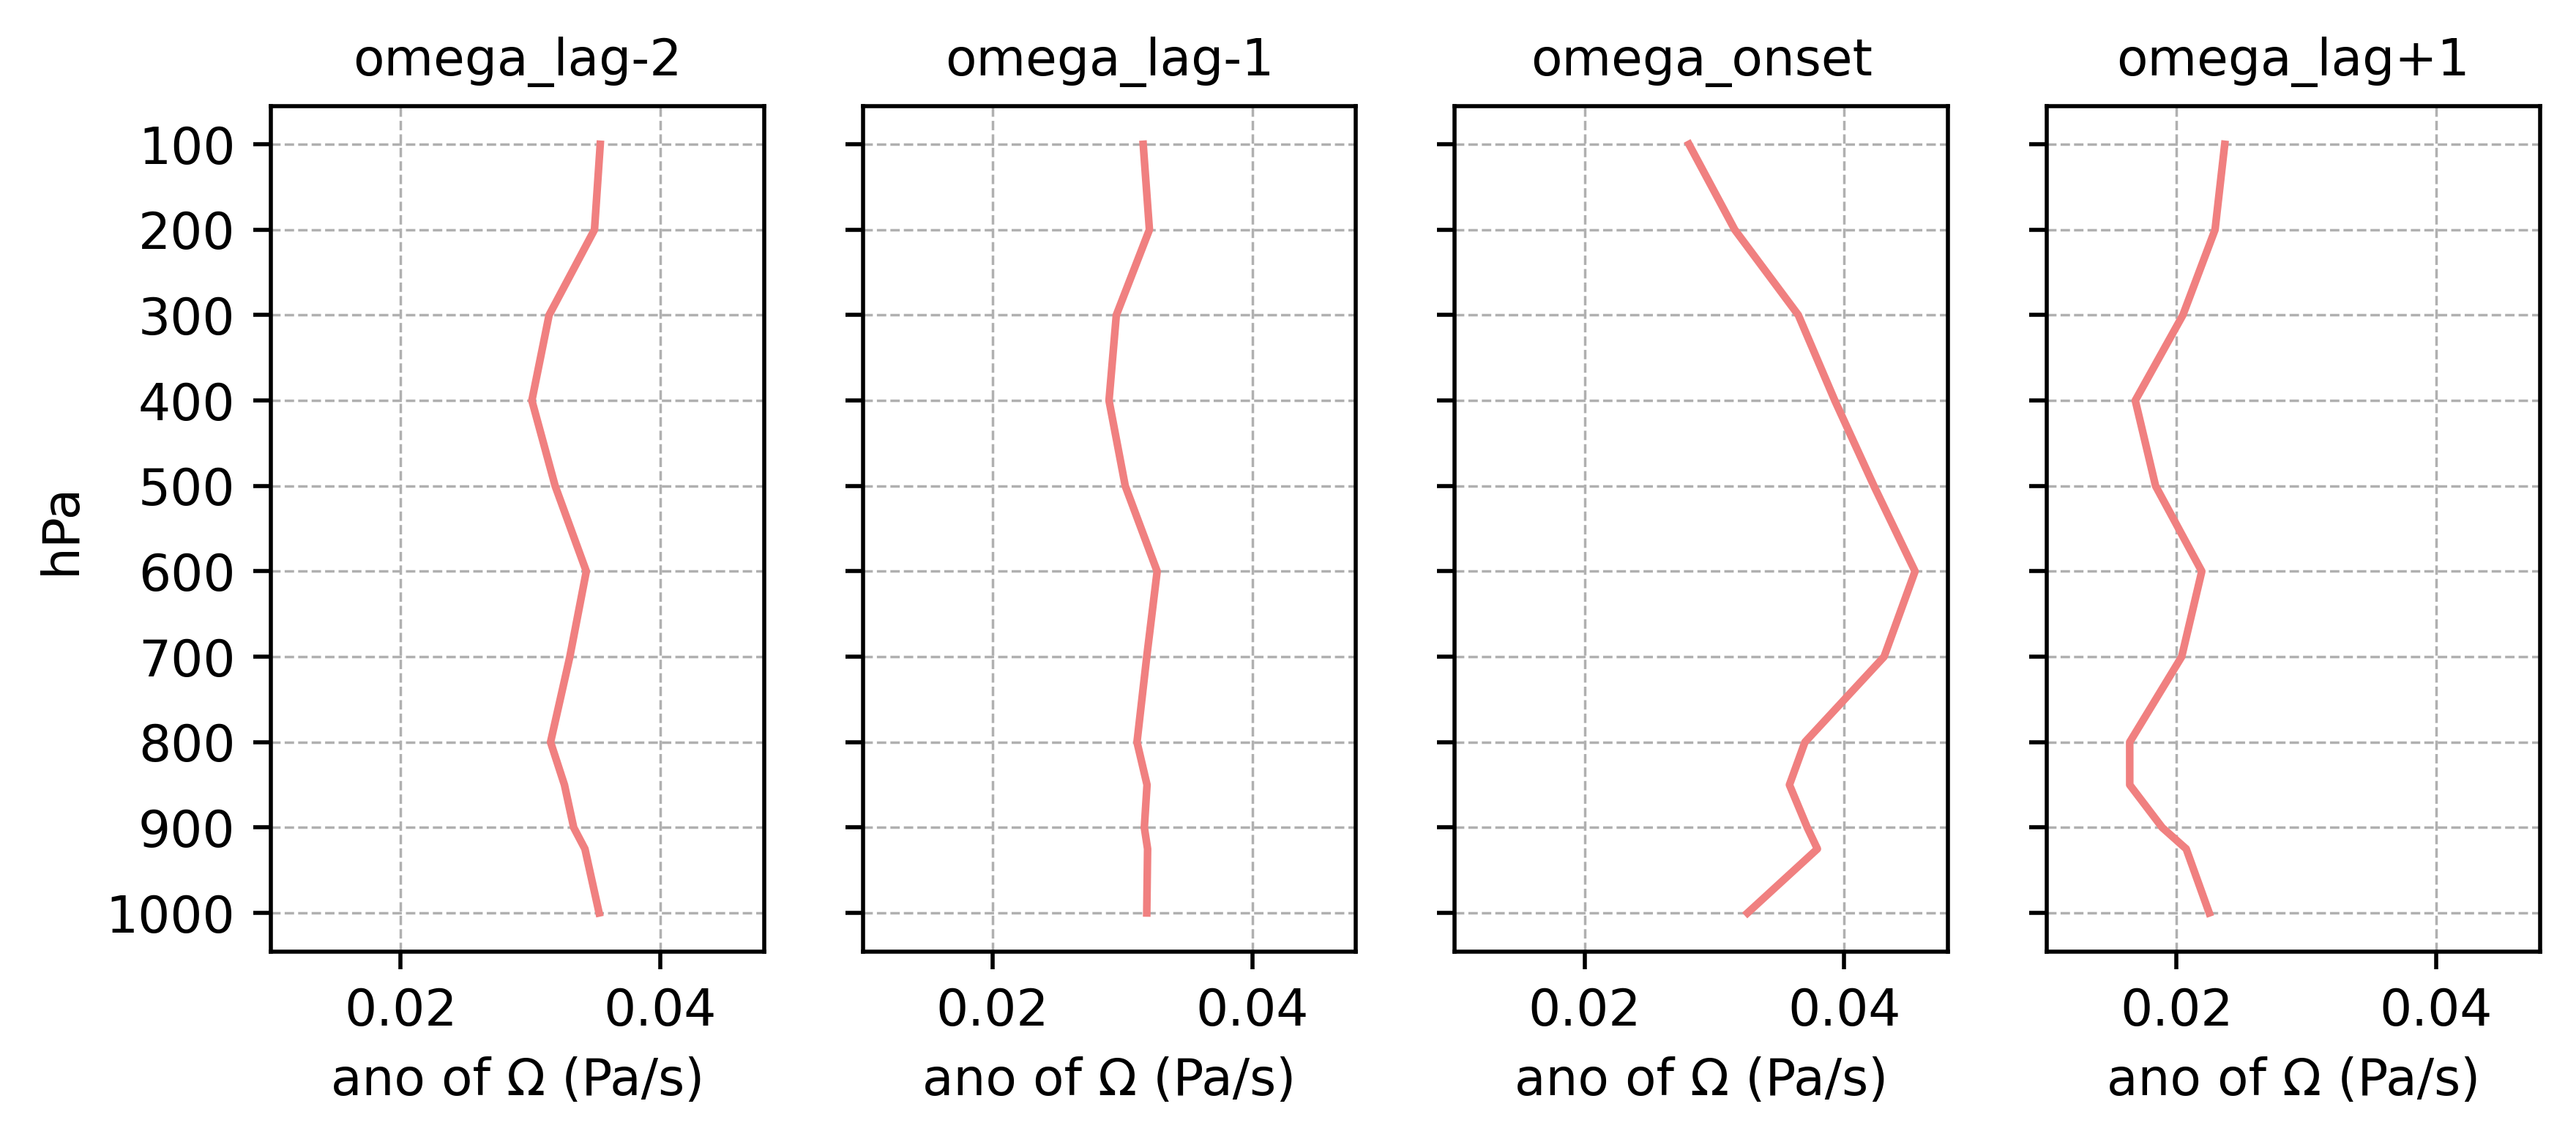

In [195]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(1, 4, figsize=(8, 3), dpi=500)
namessomega_on = ['omega_lag-2', 'omega_lag-1', 'omega_onset', 'omega_lag+1']

for i, (qt, subplot, name) in enumerate(zip(variaomega_on, ax.flat, namessomega_on)):
    lines = subplot.plot(qt, ds_omega.level, c = '#f08080')
    subplot.set_title(name, fontsize=10)
    subplot.set_xlim(0.01, 0.048)
    subplot.grid(ls='--', lw=0.5)
    subplot.set_xlabel('ano of Ω (Pa/s)')
    if i != 0:  # Remove y-tick labels for all subplots except the first one
        subplot.set_yticks(np.arange(100, 1001, 100))
        subplot.set_yticklabels([])  # Remove y-tick labels
    else:  
        subplot.set_yticks(np.arange(100, 1001, 100))
        subplot.set_ylabel('hPa')
    subplot.invert_yaxis()

plt.show()